In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from statsmodels.formula.api import ols

In [3]:
telecom_churn = pd.read_csv("telecom_churn.csv", index_col = 0)
print(telecom_churn.head())

   account_length  area_code  international_plan  voice_mail_plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5        

In [5]:
#No missing value
print(telecom_churn.isna().sum())

account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [10]:
X = telecom_churn[['total_day_charge',  'total_eve_charge','total_night_charge','customer_service_calls' ]].values 
y = telecom_churn['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 57, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 6)
# k-NN classifier using the training data (X_train and y_train).
knn.fit(X_train, y_train)

#computes the accuracy score of the k-NN classifier on the testing data (X_test and y_test) to assess 
#its performance. The accuracy score is a measure of HOW MANY MODEL OF THE PREDICTIONS are correct.
print(knn.score(X_test, y_test))

0.879


In [11]:
X = telecom_churn[['total_day_charge',  'total_eve_charge','total_night_charge','customer_service_calls' ]].values 
y = telecom_churn['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25, random_state = 57, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 6)
# k-NN classifier using the training data (X_train and y_train).
knn.fit(X_train, y_train)

#computes the accuracy score of the k-NN classifier on the testing data (X_test and y_test) to assess 
#its performance. The accuracy score is a measure of HOW MANY MODEL OF THE PREDICTIONS are correct.
print(knn.score(X_test, y_test))

0.8776978417266187


In [12]:
X = telecom_churn[['total_day_charge',  'total_eve_charge','total_night_charge','customer_service_calls' ]].values 
y = telecom_churn['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 57, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 6)
# k-NN classifier using the training data (X_train and y_train).
knn.fit(X_train, y_train)

#computes the accuracy score of the k-NN classifier on the testing data (X_test and y_test) to assess 
#its performance. The accuracy score is a measure of HOW MANY MODEL OF THE PREDICTIONS are correct.
print(knn.score(X_test, y_test))

0.8770614692653673


The accuracy score is a measure of HOW MANY MODEL OF THE PREDICTIONS are correct. Above three test between 30%, 25% and 20% as test size, 30% gives the best accuracy as it is 87.9% which is the highest out of all three

1 : 0.8395802098950524
2 : 0.8725637181409296
3 : 0.8695652173913043
4 : 0.8830584707646177
5 : 0.8845577211394303
6 : 0.8770614692653673
7 : 0.8830584707646177
8 : 0.8800599700149925
9 : 0.8800599700149925
10 : 0.8800599700149925
11 : 0.8845577211394303
12 : 0.8830584707646177
13 : 0.8830584707646177
14 : 0.8830584707646177
15 : 0.8830584707646177
16 : 0.881559220389805
17 : 0.8800599700149925
18 : 0.8770614692653673
19 : 0.8800599700149925
20 : 0.881559220389805


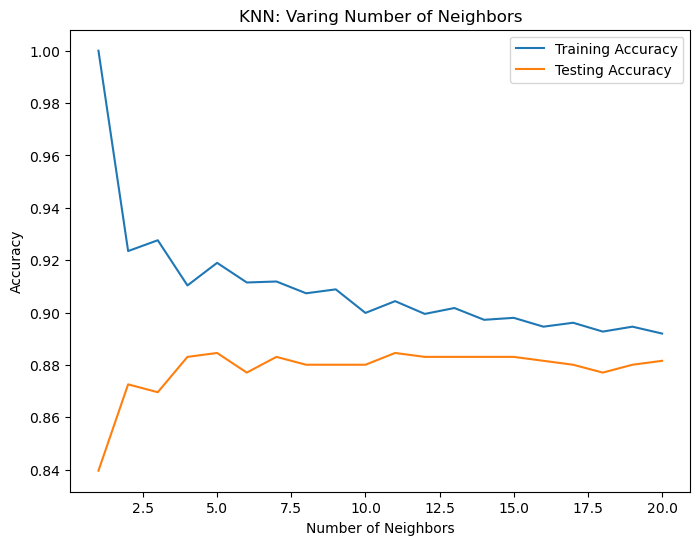

In [23]:
neighbors = np.arange(1,21)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    
    # create a k-NN classifier (knn) with that value as the number of neighbors.
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    
    # create a k-NN classifier (knn) with that value as the number of neighbors.
    knn.fit(X_train, y_train)
    
    # calculate the training accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    # calculate the TESTING accuracy
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    print(neighbor ,":" , test_accuracies[neighbor])
#print(test_accuracies.values())
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
plt.figure(figsize = (8,6))
plt.title('KNN: Varing Number of Neighbors')
plt.plot(neighbors, my_train, label = 'Training Accuracy')
plt.plot(neighbors, my_test, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

K value of 11 does give the best accuracy as its value is  0.8845577211394303 which is the highesg

In [26]:
X = telecom_churn[['total_day_charge',  'total_eve_charge','total_night_charge','customer_service_calls' ]].values 
y = telecom_churn['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.88, random_state = 57, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 11)
# k-NN classifier using the training data (X_train and y_train).
knn.fit(X_train, y_train)

X_new = np.array([[35.0, 17.5 , 10.1 , 1], [107.0 , 19.0 , 24.1, 0] , [13.0, 10.9 , 11.2 , 2] , [67.9 , 45.7 , 34.5 , 1]])
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0 1]


In [57]:
CustName = pd.read_csv("newData.csv")
X_new = CustName[["day_charge" , "eve_charge" , "night_charge"]].values
X_train, X_test = train_test_split(X_new ,test_size = 0.88, random_state = 57)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train)
y_pred = knn.predict(X_new)
print(y_pred)

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


CustName = pd.read_csv("newData.csv")

X = CustName[["day_charge", "eve_charge", "night_charge"]].values
y = CustName['cust_name'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.88, random_state=57, stratify = y)


knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)


y_pred = knn.predict(X)

print(y_pred)
